In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils_iFEMG_feature import NotchFilter, ButterFilter

In [8]:
# 读取原始数据
# clinical_subject = ['w8s1', '0912s1', '0912s2', '0919s2', '0926s1', '0926s2', '1010s1', '1017s1', '1017s2', '1024s1', '1107s1']
raw_data = pd.read_table(r"E:\Data\paper2\积水潭患者数据集\0912s1\healthy\bi-1.db", sep = ';', header = None)
raw_data.head

<bound method NDFrame.head of                              0   1     2     3      4   5   6   7   8    9   \
0       2023-09-12 11:22:00,082   0     0     0  11212   0   0   0   0  230   
1       2023-09-12 11:22:00,083   0     0     0  11212   0   0   0   0  232   
2       2023-09-12 11:22:00,083   0  3469     0  11212   0   0   0   0  226   
3       2023-09-12 11:22:00,083   0  3469  6592  11212   0   0   0   0  219   
4       2023-09-12 11:22:00,083   0  3469  6592  11221   0   0   0   0  231   
...                         ...  ..   ...   ...    ...  ..  ..  ..  ..  ...   
101036  2023-09-12 11:23:22,775   0  3814  7849  11415   0   0   0   0  233   
101037  2023-09-12 11:23:22,775   0  3814  7849  11415   0   0   0   0  226   
101038  2023-09-12 11:23:22,775   0  3814  7849  11415   0   0   0   0  227   
101039  2023-09-12 11:23:22,776   0  3814  7849  11415   0   0   0   0  231   
101040  2023-09-12 11:23:22,776   0  3814  7849  11415   0   0   0   0  222   

          10   11    

In [9]:
# 采样频率 1626 或 1222
fs = 1222
# 读取每通道信号
FMG1 = raw_data.iloc[:, 2].values
FMG2 = raw_data.iloc[:, 3].values
FMG3 = raw_data.iloc[:, 4].values
sEMG1 = raw_data.iloc[:, 10].values
sEMG2 = raw_data.iloc[:, 11].values
sEMG3 = raw_data.iloc[:, 12].values

In [10]:
# sEMG信号滤波
filter1 = NotchFilter(f0=50, fs=fs, Q=10)
filter2 = NotchFilter(f0=150, fs=fs, Q=10)
filter3 = NotchFilter(f0=203.7, fs=fs, Q=10)
filter4 = NotchFilter(f0=250, fs=fs, Q=10)
filter5 = NotchFilter(f0=350, fs=fs, Q=10)
filter6 = NotchFilter(f0=407.4, fs=fs, Q=10)
filter7 = NotchFilter(f0=450, fs=fs, Q=10)
bandpassfilter = ButterFilter(fs = fs, fc = [10, 500], order = 8, ftype='bandpass')

sEMG1_filtered = bandpassfilter.filt(filter7.filt(filter6.filt(filter5.filt(filter4.filt(filter3.filt(filter2.filt(filter1.filt(sEMG1))))))))
sEMG2_filtered = bandpassfilter.filt(filter7.filt(filter6.filt(filter5.filt(filter4.filt(filter3.filt(filter2.filt(filter1.filt(sEMG2))))))))
sEMG3_filtered = bandpassfilter.filt(filter7.filt(filter6.filt(filter5.filt(filter4.filt(filter3.filt(filter2.filt(filter1.filt(sEMG3))))))))

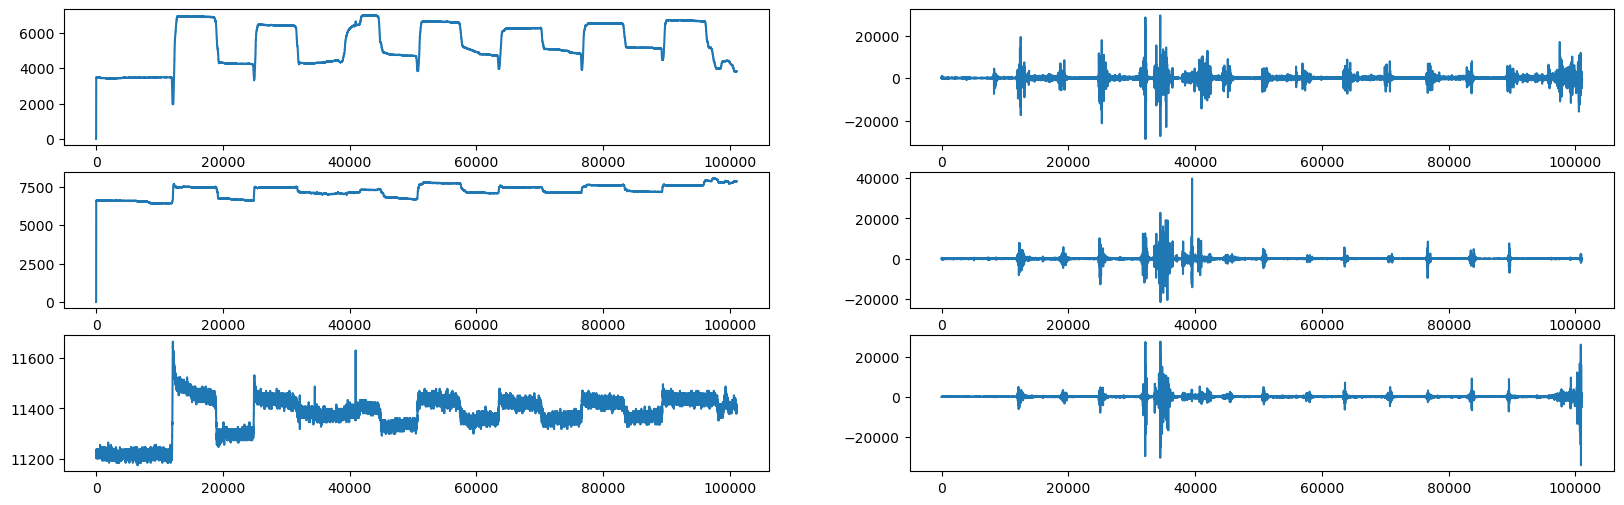

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(3,2,1)
plt.plot(FMG1)
plt.subplot(3,2,3)
plt.plot(FMG2)
plt.subplot(3,2,5)
plt.plot(FMG3)
plt.subplot(3,2,2)
plt.plot(sEMG1_filtered)
plt.subplot(3,2,4)
plt.plot(sEMG2_filtered)
plt.subplot(3,2,6)
plt.plot(sEMG3_filtered)
plt.show()
